# Introduction

Billboard ranks the 200 most popular albums in a given week. This implies that perfomance of a album on the billboard top 200 is dependent on the listeners. The listening habits of the people will define the success of how an albulm does on such a metric. We enjoy listening to music and wish to investigate if we can predict the sucecess of new album or if we can discover similarites of albums that do well on the BillBoard Top 100. Successful completion of this project will uncover patterns in the listening habits of people. This can bring insight into the population at a given time interval.

# Spotify and Pitchfork Reviews

We were given three large datasets with information related to albums, reviews, and the acoustic features of a song. We will begin the project by performing some preliminary analysis by looking at the various attributes in the dataset. Based off the initial glimpse into the dataset and plots, we will formulate a direction for the project to take. We will proceed by wrangling the data by looking for missing values, possibly imputing missing values, and if necessary, perform PCA to reduce the dimensionality of our dataset. We will then apply the various techniques acquired from our class in datascience. Finally, we will form conclusions based off our findings. We will support our conclusions by any necessary plots, or any other methods. 

# Modules

We will mostly be using seaborn for creating our visualizations. We will use pandas and numpy to create and aggregate our data. Finally, we will be using sklearn for various machine learning methods.

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import linear_model

# Load DataSet

The datasets were provided in CSV format uploaded in a google drive. We will need to download them onto our personal machine and upload them to the juptyer notebook.

In [2]:
# Read in CSV files with columns of interest

AcousticFeatures = pd.read_csv("acoustic_features.csv", index_col='index', 
                               usecols=['index','album','date','song','acousticness','danceability','duration_ms','energy','instrumentalness','key','liveness','loudness','mode','speechiness','tempo'])
albums = pd.read_csv("albums.csv", index_col='index', usecols=['index','album','artist','rank','date',])


reviews = pd.read_csv('reviews.csv', index_col = "index", 
                     usecols = ['index','artist','album','genre','score'])


In [3]:
# Glimpse data and take note of possible features to use
AcousticFeatures.head(10)
reviews.head(2)
albums=albums.rename(columns={'date':'rank_date'})
albums=albums.drop(albums.index[0])
albums.head()


,rank_date,artist,album,rank
index,,,,
1,2019-01-19,A Boogie Wit da Hoodie,Hoodie SZN,1.0
2,2019-01-19,21 Savage,I Am > I Was,2.0
3,2019-01-19,Soundtrack,Spider-Man: Into The Spider-Verse,3.0
4,2019-01-19,Meek Mill,Championships,4.0
5,2019-01-19,Post Malone,beerbongs & bentleys,5.0


# Initial Observations

The dataset acoustic features has 20 columns in the dataset. The dataset consists of columns used to identify a song and album as well as different metrics to describe the music features of the given songs such as 'danceability'. 

The dataset reviews has 12 columns. It has column names to categorize the music. The other columns provide information related to the review conducted on the albulm such as author and rating. 

The dataset albums has information related to the albumn. It has numerical data such as ranking. 


## Formulation of project

We noticed that in the dataset albums there is a rank column. We are interested as to what acoustic features and or reviews will make an album become successful in the billboard 200. The data set contains dates from as far back as 1963. We will subset the data to focus on the era of music in the 2010's since we are most familiar with the songs, artists, and albulms in this era. 

## Question at hand

Can we predict which albums from the 2010's will be in the top 100?

What acoustic features are evident in a popular song?

What genres of music will dominate this era?

# DataWrangling

## Subsetting the data

The information related to albums spans all the way back to the 1963. We could attempt to work with all the data. However, music is defined by different era. For example in the 1960's, the psychedelic era was dominant in music with artists such as Jimi Hendrix. We are interested in the 2010's where it is not apparent as to what type of music dominates this era. We wish to investigate this era since we are most familiar with it.

In [4]:
# Subset all data to year of interest
AcousticFt2010s = AcousticFeatures[(AcousticFeatures['date']>= '2010')].drop('date',axis=1)
AcousticFt2010s.head(5)
albums2010s = albums[albums['rank_date']>='2010']
albums2010s.head()

,rank_date,artist,album,rank
index,,,,
1,2019-01-19,A Boogie Wit da Hoodie,Hoodie SZN,1.0
2,2019-01-19,21 Savage,I Am > I Was,2.0
3,2019-01-19,Soundtrack,Spider-Man: Into The Spider-Verse,3.0
4,2019-01-19,Meek Mill,Championships,4.0
5,2019-01-19,Post Malone,beerbongs & bentleys,5.0


## Combining datasets

Some of the features that we want to work with are found through the different data sets. We will be merging the different data sets into one finale data set.

In [5]:
AlbumFtRank = AcousticFt2010s.merge(albums2010s,on='album')
AlbumFtRank.head(20)

,song,album,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,rank_date,artist,rank
0,Voices In My Head,Hoodie SZN,0.0555,0.754,142301.0,0.663,0.000000,6.0,0.101,-6.311,0.0,0.427,90.195,2019-01-19,A Boogie Wit da Hoodie,1.0
1,Voices In My Head,Hoodie SZN,0.0555,0.754,142301.0,0.663,0.000000,6.0,0.101,-6.311,0.0,0.427,90.195,2019-01-12,A Boogie Wit da Hoodie,2.0
2,Voices In My Head,Hoodie SZN,0.0555,0.754,142301.0,0.663,0.000000,6.0,0.101,-6.311,0.0,0.427,90.195,2019-01-05,A Boogie Wit da Hoodie,2.0
3,Beasty,Hoodie SZN,0.2920,0.860,152829.0,0.418,0.000000,7.0,0.106,-9.061,0.0,0.158,126.023,2019-01-19,A Boogie Wit da Hoodie,1.0
4,Beasty,Hoodie SZN,0.2920,0.860,152829.0,0.418,0.000000,7.0,0.106,-9.061,0.0,0.158,126.023,2019-01-12,A Boogie Wit da Hoodie,2.0
5,Beasty,Hoodie SZN,0.2920,0.860,152829.0,0.418,0.000000,7.0,0.106,-9.061,0.0,0.158,126.023,2019-01-05,A Boogie Wit da Hoodie,2.0
6,I Did It,Hoodie SZN,0.1530,0.718,215305.0,0.454,0.000046,8.0,0.116,-9.012,1.0,0.127,89.483,2019-01-19,A Boogie Wit da Hoodie,1.0
7,I Did It,Hoodie SZN,0.1530,0.718,215305.0,0.454,0.000046,8.0,0.116,-9.012,1.0,0.127,89.483,2019-01-12,A Boogie Wit da Hoodie,2.0
8,I Did It,Hoodie SZN,0.1530,0.718,215305.0,0.454,0.000046,8.0,0.116,-9.012,1.0,0.127,89.483,2019-01-05,A Boogie Wit da Hoodie,2.0
9,Swervin (feat. 6ix9ine),Hoodie SZN,0.0153,0.581,189487.0,0.662,0.000000,9.0,0.111,-5.239,1.0,0.303,93.023,2019-01-19,A Boogie Wit da Hoodie,1.0


## Missing Values

Various algorithms will not work with missing values. We will need to check if there are any observations with missing values with the two data sets that were merged. If the dataset has missing values, will need to figure out how to treat the missing values. 

In [6]:
# check to see if there are any missing values
AlbumFtRank.isnull().values.any()
# check to see what columns have mising values
AlbumFtRank.isnull().sum()
# Print rows that have missing values
AlbumFtRank[AlbumFtRank.isnull().any(axis=1)]

,song,album,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,rank_date,artist,rank
730588,"Brave Sword, Braver Soul",Rio 2: Music From The Motion Picture,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-05-03,Soundtrack,124.0
936857,Group Therapy Intro (ABGT325),Group Therapy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-06-25,Above & Beyond,163.0


## Imputing Missing values

There are two rows that have missing observations. The mising values are all numeric values. We have the option to impute the missing values with the mean, median, or correlation. We have chosen to go with median since it is more robust to outliers. 

In [7]:
# Impute median values on Soundtrack,note: rio has rank 124
RioImpute = AlbumFtRank[AlbumFtRank['artist']=='Soundtrack'].median()
RioImpute
# Impute into the row of Rio
AlbumFtRank.fillna(value= RioImpute, inplace= True,limit= 1)

# Impute median values on album group Therapy

AboveBeyondImpute = AlbumFtRank[AlbumFtRank['artist']=='Above & Beyond'].median()
AboveBeyondImpute
AlbumFtRank.fillna(value=AboveBeyondImpute, inplace = True)

# Check to see if there is imputer values 
AlbumFtRank[AlbumFtRank['album']=='Group Therapy']
AlbumFtRank[AlbumFtRank['album']=="Rio 2: Music From The Motion Picture"]


# check to see if there are any missing values
AlbumFtRank[AlbumFtRank.isnull().any(axis=1)]
AlbumFtRank.isnull().sum()


song                0
album               0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
rank_date           0
artist              0
rank                0
dtype: int64

# Prelimary Analysis

We will start by looking at some of the variable distributions. We are interested to see if some of the data is skewed. Sweked distributions tell us that the songs that are popular favor certain feature qualities.

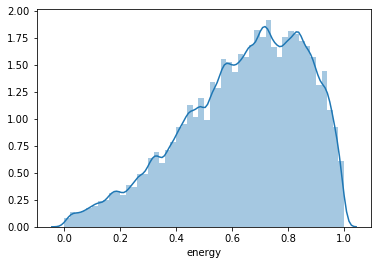

In [8]:
sns.distplot(AlbumFtRank['energy'])

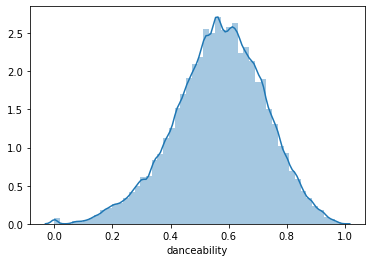

In [9]:
sns.distplot(AlbumFtRank['danceability'])

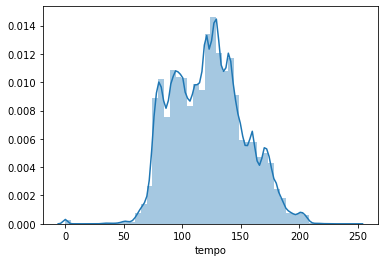

In [10]:
sns.distplot(AlbumFtRank['tempo'])

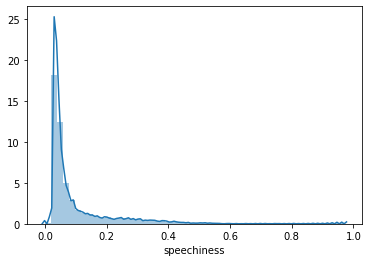

In [11]:
sns.distplot(AlbumFtRank['speechiness'])

# Seperate groups of songs into two groups

We are intersted in investigating if we can distinguish songs from the top 100. We will be dividing the data set into two subsets where will one contain albumns that are in the top 100 of the Billboard Top 200. The other subset will contain the reset of the Billboard Top 200 albums.

In [12]:
# Top 100 songs vs rest
Top100  = AlbumFtRank[AlbumFtRank['rank']<=100.0]
TopRest = AlbumFtRank[AlbumFtRank['rank']>100.0]

# EDA
We will proceed by looking at the distributions of the two subsets. We will compare the distributions of the two subsets to get an idea of how different the features of the albums will be. By looking at each catagory of an album, we can see that no one future is able to distinguish the difference in an album in the Top100 vs the rest.


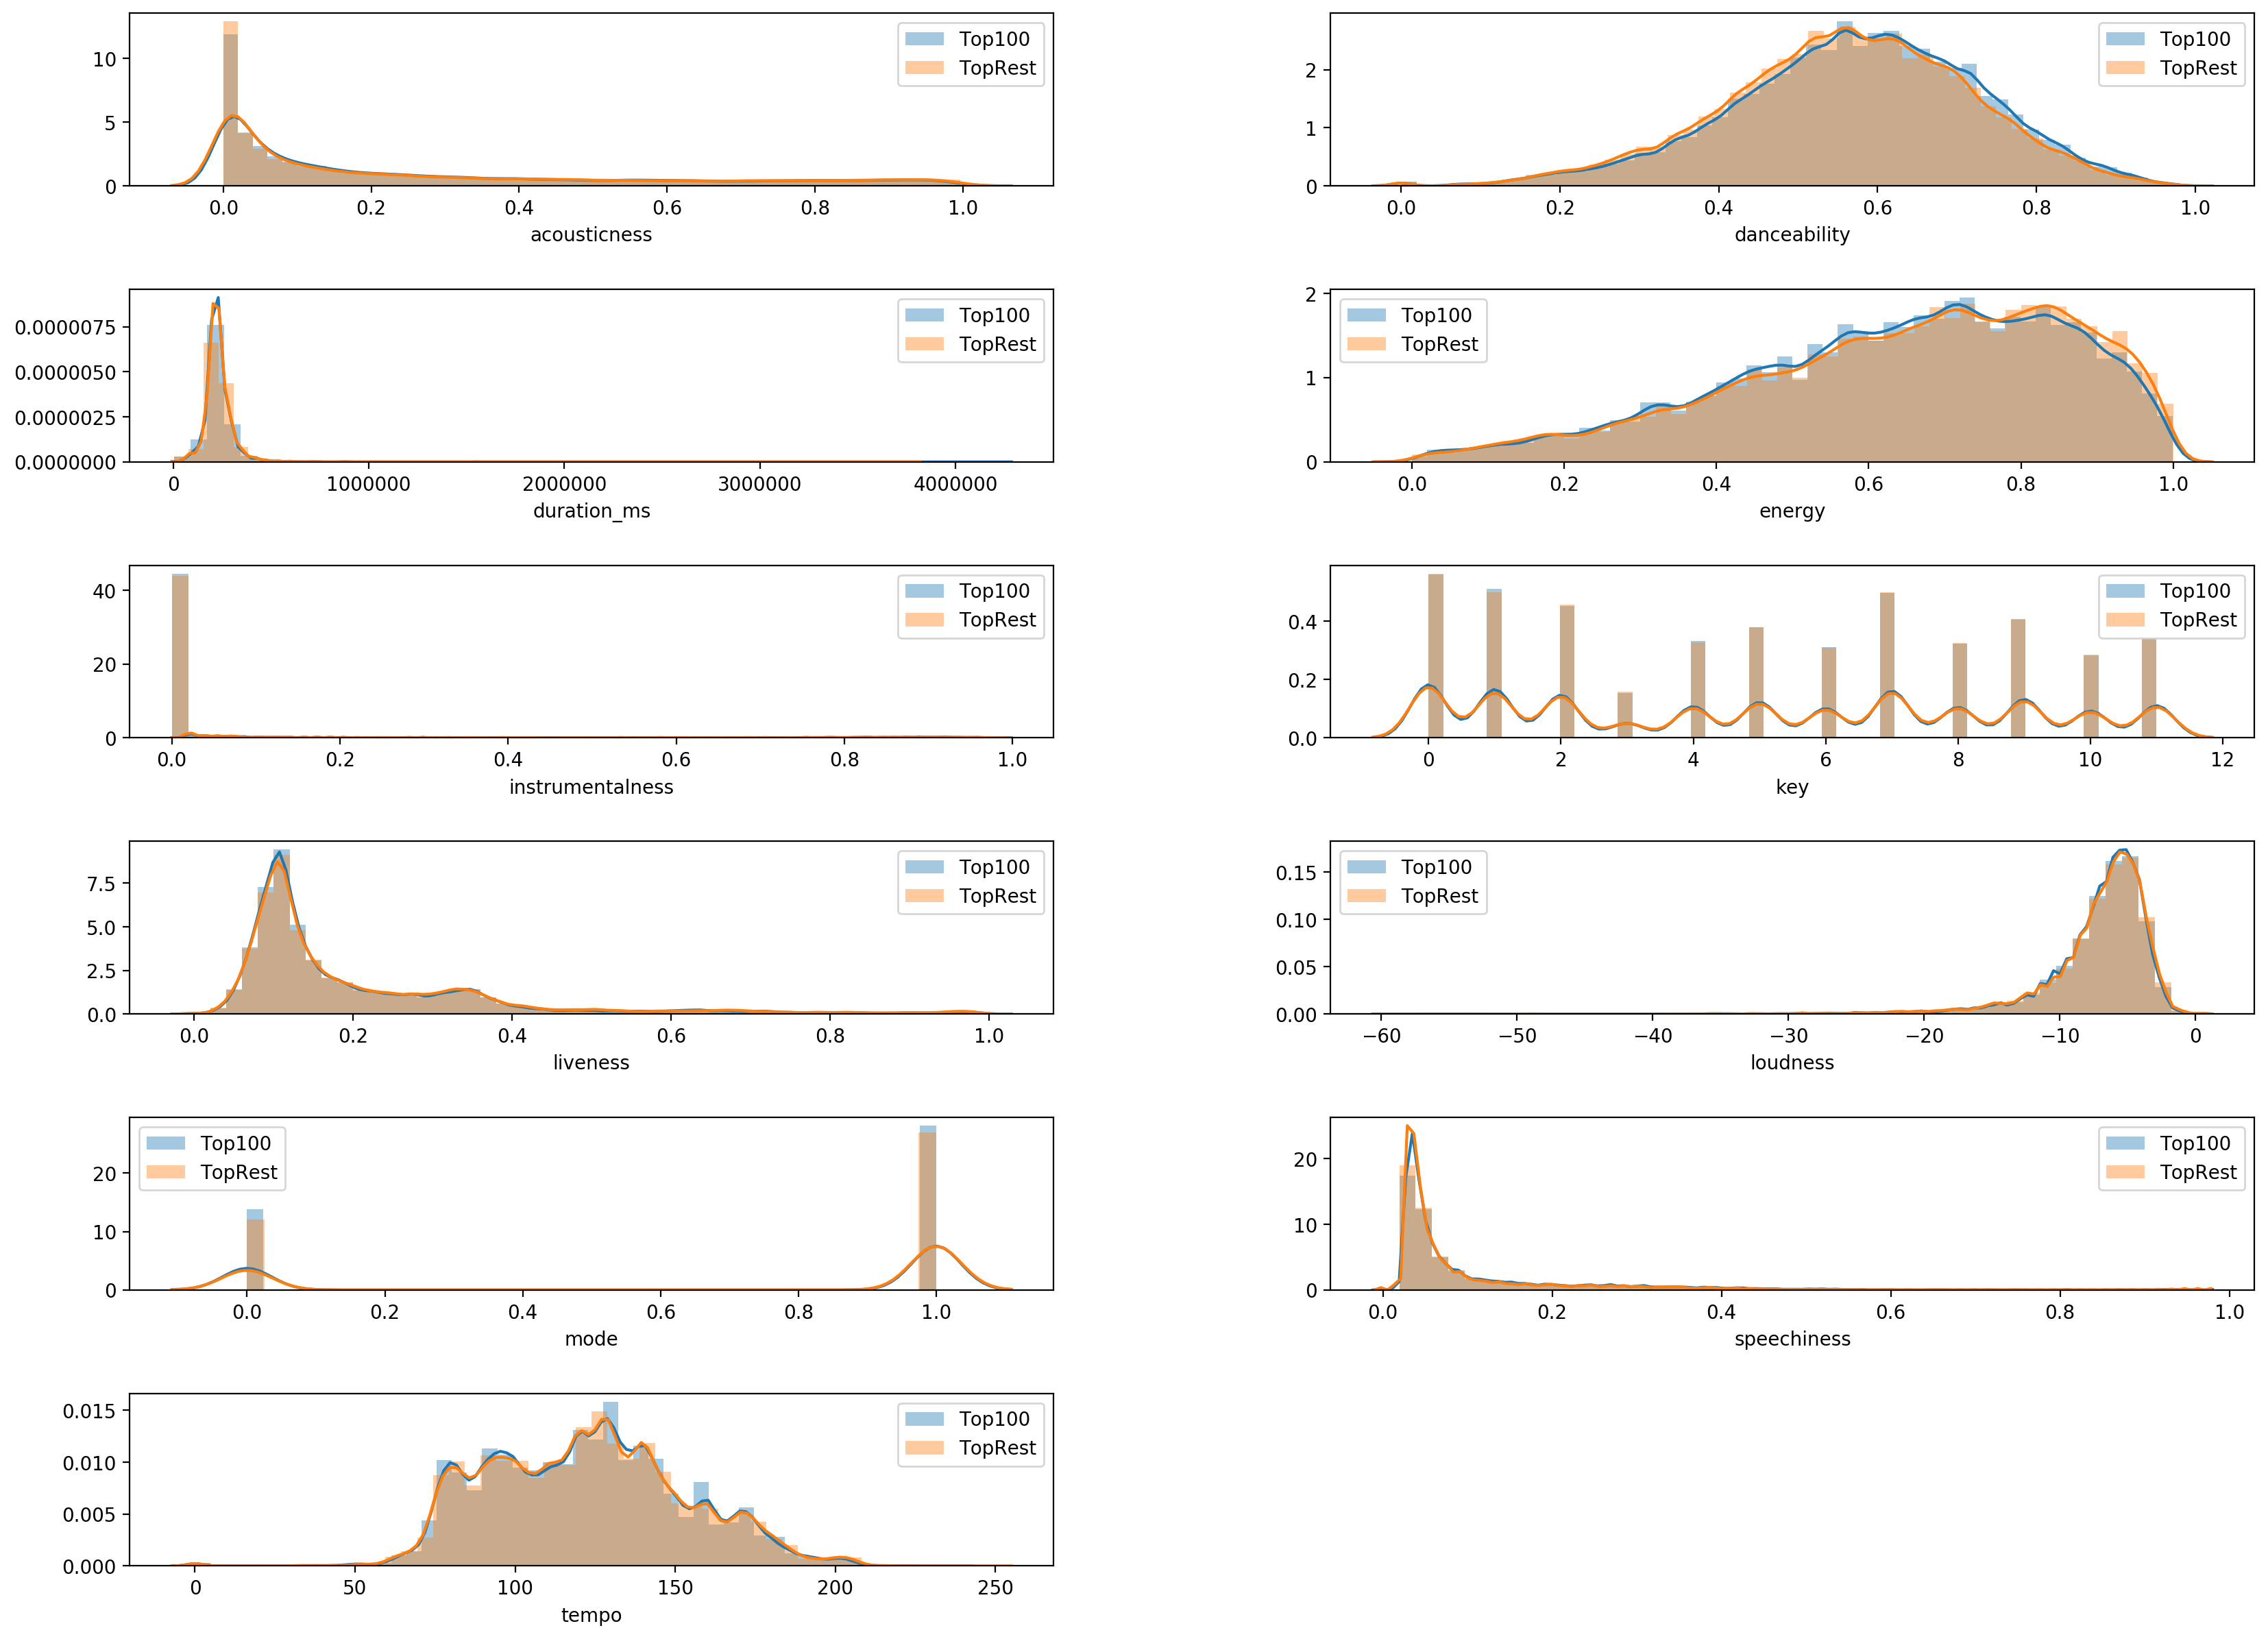

In [13]:
Features = AlbumFtRank.columns[2:13]

fig = plt.figure(figsize=(20,15), dpi=200)
fig.subplots_adjust(hspace=0.6, wspace=0.3)

for i,ft in zip(range(1,12),Features):
    ax = fig.add_subplot(6,2,i)
    sns.distplot(Top100[ft], label = 'Top100')
    sns.distplot(TopRest[ft], label = 'TopRest')
    plt.legend()

# Adding Genre

We will merge the last data set with our already merged data set. We are merging all three data sets together to see the distribution of album genre in the BillBoard Top 200

In [14]:
AlbumFtGenre = AlbumFtRank.merge(reviews, on=['album','artist'])
AlbumFtGenre
AlbumFtGenre.isnull().sum() # We have 710 missing genre

song                  0
album                 0
acousticness          0
danceability          0
duration_ms           0
energy                0
instrumentalness      0
key                   0
liveness              0
loudness              0
mode                  0
speechiness           0
tempo                 0
rank_date             0
artist                0
rank                  0
genre               710
score                 0
dtype: int64

# Missing Genre

After merging the last data set, we obtained a data set that contais 710 missing values. All the observations had a missing value in the genre column. We plan on imputing the missing data buy using the spotify API. We will be using the module spotipy as a wrapper for the spotify API. If it is possible, we plan on extracting the missing genre information for the albums with this method. 

In [15]:
%%bash
pip install spotipy

In [16]:
# Credentials for accessing data
credentials = SpotifyClientCredentials(client_id='24e05afbf6f24462be3f9f2ceef38335',
                                                      client_secret='125630aad8a546409cd97c2765500f5b')

sp = spotipy.Spotify(client_credentials_manager=credentials)

# Print the information related to a track
results = sp.search(q='Prequelle', type='track', limit=1)
print(results)

# genre of the albums were not found with this API

{'tracks': {'href': 'https://api.spotify.com/v1/search?query=Prequelle&type=track&offset=0&limit=1', 'items': [{'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/1Qp56T7n950O3EGMsSl81D'}, 'href': 'https://api.spotify.com/v1/artists/1Qp56T7n950O3EGMsSl81D', 'id': '1Qp56T7n950O3EGMsSl81D', 'name': 'Ghost', 'type': 'artist', 'uri': 'spotify:artist:1Qp56T7n950O3EGMsSl81D'}], 'available_markets': ['CA', 'MX', 'US'], 'external_urls': {'spotify': 'https://open.spotify.com/album/1KMfjy6MmPorahRjxhTnxm'}, 'href': 'https://api.spotify.com/v1/albums/1KMfjy6MmPorahRjxhTnxm', 'id': '1KMfjy6MmPorahRjxhTnxm', 'images': [{'height': 640, 'url': 'https://i.scdn.co/image/853ec5b357eb4bb5a974430c07cb2c0543998026', 'width': 640}, {'height': 300, 'url': 'https://i.scdn.co/image/8bc37737491b742f941bf21035de43fcfdc74406', 'width': 300}, {'height': 64, 'url': 'https://i.scdn.co/image/6c81be7e7c1d3f401d53afd765b86498182af4cb', 'width': 64}], 'name': 'Pre

### Variable Selection with Random Forest

We were unable to impute the missing data with data from spotipy. The information provided by spotipy did not include the additional genre data that we were looking for. The missing values are characters. We can not impute the missing data the same we impute the missing numerical values. We will impute the missing genre data by using KNN. Our reasoning for using this method is that genres that similar to each other will be close to each to each other. We will first reduce the dimensionality of the fearures by using random forests. In PSTAT 131, it was taught that random forests were used for selection of important variables. We will use this method for this project. 

In [18]:
# Obtain most important Features 
CompleteGenreData = AlbumFtGenre.dropna()
CompleteGenreData['Top100'] = CompleteGenreData['rank'].apply(lambda x: True if x <= 100.0 else False)

# All of the Features in the dataset
AllFeatures = ['acousticness','danceability','duration_ms','energy','instrumentalness','key', 'loudness',
              'mode', 'speechiness', 'tempo','score']

# Split data into features and labels

x = CompleteGenreData[AllFeatures]
y = CompleteGenreData['Top100']

# Convert data to array for model to run
x = np.asarray(x)
y = np.asarray(y)

# fit the model
model = ExtraTreesClassifier()
model.fit(x, y)

print(model.feature_importances_)

# We want the features that have high values 

print(model.feature_importances_ >= 0.090)

GenreFt = ['acousticness', 'danceability', 'energy', 'loudness', 'speechiness', 'tempo']

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.10333493 0.09232523 0.0875369  0.09476456 0.05644609 0.08358962
 0.0915755  0.02146502 0.09634446 0.0945607  0.17805699]
[ True  True False  True False False  True False  True  True  True]


## KNN for Genre

With the seleced Variables of acousticness, danceability, energy, loudness, speechiness, and temp, we will use KNN to obtain the missing genre labels.

In [19]:
AlbumFtGenre.isnull().sum() # We have 710 missing genre

# The test set will be the missing labels that we are trying to predict

MissingGenreData = AlbumFtGenre[AlbumFtGenre.isnull().any(axis=1)]


GenreTestData= MissingGenreData[GenreFt]

# Obtain values for test dataset
GenreTestData = GenreTestData.values

# Create training dataset

CompleteGenreData = AlbumFtGenre.dropna()

GenreTrainData = CompleteGenreData[GenreFt]

# obtain values from train dataset

GenreTrainData = GenreTrainData.values

#Labels for training set

GenreTrainLabels = CompleteGenreData['genre']

In [20]:
# scale the data first
scaler = StandardScaler()
scaler.fit(GenreTrainData)

TransGenreTrain = scaler.transform(GenreTrainData)
TransGenreTest =  scaler.transform(GenreTestData)

In [21]:
# make prediction with kneighest neigbore
classifier = KNeighborsClassifier(n_neighbors=5,algorithm='kd_tree')
classifier.fit(TransGenreTrain, GenreTrainLabels)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [22]:
# Predictions for the classifier
genrePred = classifier.predict(TransGenreTest)
genrePred = pd.Series(genrePred)

genrePred



FilledMissingGenre = MissingGenreData.assign(genre = genrePred.values)

FilledMissingGenre


,song,album,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,rank_date,artist,rank,genre,score
76353,Ashes,Prequelle,0.067600,0.195,81160.0,0.0394,0.770000,9.0,0.3880,-14.886,1.0,0.0375,90.702,2018-07-07,Ghost,170.0,Rock,6.1
76354,Ashes,Prequelle,0.067600,0.195,81160.0,0.0394,0.770000,9.0,0.3880,-14.886,1.0,0.0375,90.702,2018-06-30,Ghost,103.0,Rock,6.1
76355,Ashes,Prequelle,0.067600,0.195,81160.0,0.0394,0.770000,9.0,0.3880,-14.886,1.0,0.0375,90.702,2018-06-23,Ghost,47.0,Rock,6.1
76356,Ashes,Prequelle,0.067600,0.195,81160.0,0.0394,0.770000,9.0,0.3880,-14.886,1.0,0.0375,90.702,2018-06-16,Ghost,3.0,Rock,6.1
76357,Rats,Prequelle,0.000006,0.522,261573.0,0.9440,0.482000,2.0,0.1350,-5.731,0.0,0.0936,124.029,2018-07-07,Ghost,170.0,Rock,6.1
76358,Rats,Prequelle,0.000006,0.522,261573.0,0.9440,0.482000,2.0,0.1350,-5.731,0.0,0.0936,124.029,2018-06-30,Ghost,103.0,Rock,6.1
76359,Rats,Prequelle,0.000006,0.522,261573.0,0.9440,0.482000,2.0,0.1350,-5.731,0.0,0.0936,124.029,2018-06-23,Ghost,47.0,Rock,6.1
76360,Rats,Prequelle,0.000006,0.522,261573.0,0.9440,0.482000,2.0,0.1350,-5.731,0.0,0.0936,124.029,2018-06-16,Ghost,3.0,Rock,6.1
76361,Faith,Prequelle,0.000519,0.355,269707.0,0.8220,0.071900,9.0,0.2580,-6.254,1.0,0.0512,183.894,2018-07-07,Ghost,170.0,Rock,6.1
76362,Faith,Prequelle,0.000519,0.355,269707.0,0.8220,0.071900,9.0,0.2580,-6.254,1.0,0.0512,183.894,2018-06-30,Ghost,103.0,Rock,6.1


In [23]:
# combine the two complete datasets
completeCombined = CompleteGenreData.append(FilledMissingGenre, ignore_index=True)
completeCombined
# check for missing values
completeCombined.isnull().sum()

song                0
album               0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
rank_date           0
artist              0
rank                0
genre               0
score               0
dtype: int64

# EDA for genre

We will see if the genre column reveals any interesting relationships in the data.

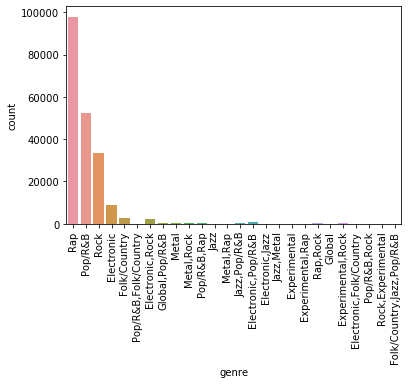

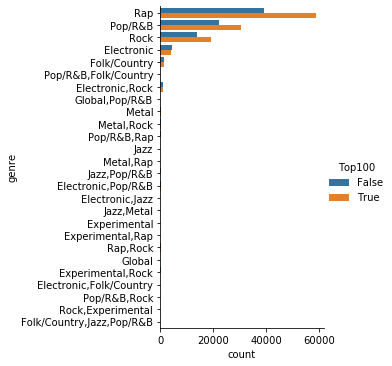

In [24]:
sns.countplot(completeCombined['genre'])
plt.xticks(rotation=90)

# Create a new column in our dataset to use at labels
completeCombined['Top100'] = completeCombined['rank'].apply(lambda x: True if x <= 100.0 else False)
completeCombined

# for difference in ranks
sns.catplot(y= 'genre', hue='Top100', kind='count' ,data=completeCombined)

# Log Transformation

The data for genre is right skewed so we will take a log transformation on the counts in order to better visualize the difference in music genre for the Billboard Top 200. 

Text(0.5, 1.0, 'Music Genre in Top 200')

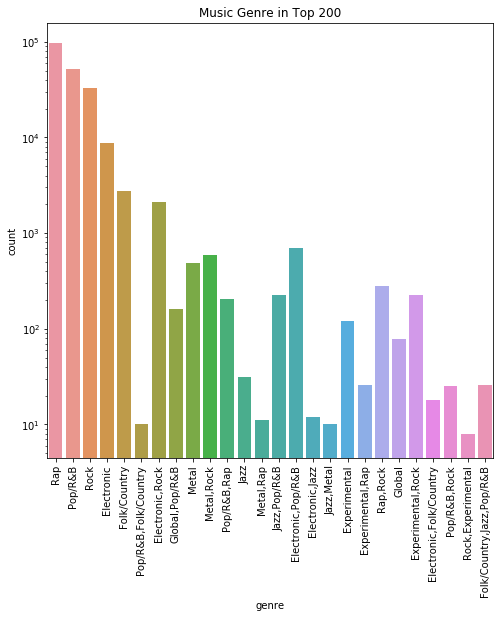

In [28]:
f, ax = plt.subplots(figsize = (8,8))
ax.set(yscale = 'log')
sns.countplot(completeCombined['genre'], ax=ax)
plt.xticks(rotation=90)
plt.title('Music Genre in Top 200')

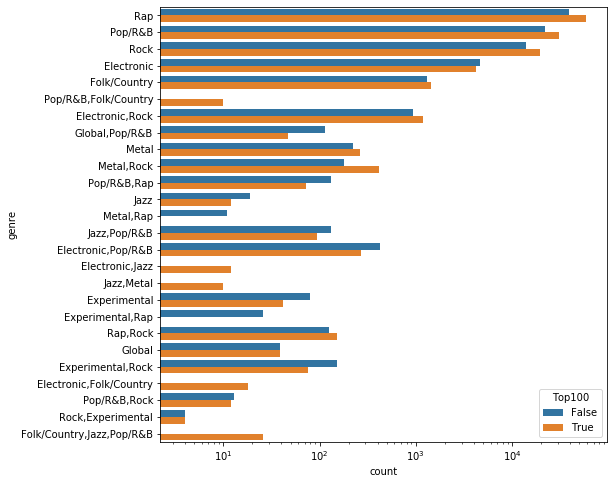

In [30]:
fig, ax = plt.subplots(figsize=(8,8))
ax.set(xscale = 'log')
sns.catplot(y= 'genre', hue='Top100', kind='count' ,data=completeCombined,ax=ax)
plt.title('Music Genre in Top 200')
plt.close(2)
plt.show()


# Final dataset

If we take a look at the data, we have more information that is needed for this analysis. We are interested in the albums and not individual tracks in the album. We will group the data by rank date and album. We will then aggregate the data with mean to obtain the average numeric values for the album. We will then aggregate by max to obtain the character values the appear the most in the data. Taking the max will ensure that any outliers in the data will be corrected. For example, in an album that is predominatly rock, there might be one or two values that indicate that a track is electronic or rap. If rock shows up more often for that album, we want to make sure that we are correctly labeling the album by the value that occurs the most. 

In [31]:
# Group the data to find the average of the album
AlbumAverage =  completeCombined.groupby(['rank_date','album']).mean()
# Group the data to find the max genre of the album
GenreGrouped = completeCombined.groupby(['rank_date','album']).max()


GenreGrouped = GenreGrouped.filter(['genre','artist'])

# Reset index to have columns to combine
AlbumAverage.reset_index()
GenreGrouped.reset_index()

# Combined to create dataset with album
ProjectDataSet = AlbumAverage.merge(GenreGrouped, on= ['rank_date','album'])

ProjectDataSet.head(10)

acousticness  danceability    duration_ms    energy  \
rank_date  album                                                               
2010-01-02 Love              0.648923      0.450769  207991.153846  0.413385   
2010-01-09 Love              0.648923      0.450769  207991.153846  0.413385   
2010-01-23 Love              0.648923      0.450769  207991.153846  0.413385   
2010-01-30 Contra            0.173787      0.626100  220422.600000  0.683500   
           July Flame        0.860538      0.490846  203350.846154  0.305538   
2010-02-06 Astro Coast       0.361910      0.504100  242929.700000  0.691500   
           Contra            0.173787      0.626100  220422.600000  0.683500   
           Transference      0.323573      0.744182  235118.818182  0.602727   
2010-02-13 Astro Coast       0.361910      0.504100  242929.700000  0.691500   
           Contra            0.173787      0.626100  220422.600000  0.683500   

                         instrumentalness       key  liveness   loudness  \
rank_date  album                                                           
2010-01-02 Love                  0.001303  3.923077  0.158308  -6.415692   
2010-01-09 Love                  0.001303  3.923077  0.158308  -6.415692   
2010-01-23 Love                  0.001303  3.923077  0.158308  -6.415692   
2010-01-30 Contra                0.059665  4.100000  0.163120  -7.876400   
           July Flame            0.110696  7.769231  0.114677 -10.371154   
2010-02-06 Astro Coast           0.087260  3.500000  0.234940  -6.631600   
           Contra                0.059665  4.100000  0.163120  -7.876400   
           Transference          0.118501  4.727273  0.135300  -8.059636   
2010-02-13 Astro Coast           0.087260  3.500000  0.234940  -6.631600   
           Contra                0.059665  4.100000  0.163120  -7.876400   

                             mode  speechiness       tempo   rank  score  \
rank_date  album                                                           
2010-01-02 Love          0.846154     0.038123  105.183538  184.0    8.5   
2010-01-09 Love          0.846154     0.038123  105.183538  158.0    8.5   
2010-01-23 Love          0.846154     0.038123  105.183538  192.0    8.5   
2010-01-30 Contra        1.000000     0.140330  146.776700    1.0    8.6   
           July Flame    0.615385     0.030354  126.599000  124.0    7.5   
2010-02-06 Astro Coast   1.000000     0.036970  134.534300  124.0    8.2   
           Contra        1.000000     0.140330  146.776700    6.0    8.6   
           Transference  0.909091     0.048127  128.287818    4.0    7.8   
2010-02-13 Astro Coast   1.000000     0.036970  134.534300  193.0    8.2   
           Contra        1.000000     0.140330  146.776700   19.0    8.6   

                         Top100 genre           artist  
rank_date  album                                        
2010-01-02 Love           False  Rock      The Beatles  
2010-01-09 Love           False  Rock      The Beatles  
2010-01-23 Love           False  Rock      The Beatles  
2010-01-30 Contra          True  Rock  Vampire Weekend  
           July Flame     False  Rock      Laura Veirs  
2010-02-06 Astro Coast    False  Rock     Surfer Blood  
           Contra          True  Rock  Vampire Weekend  
           Transference    True  Rock            Spoon  
2010-02-13 Astro Coast    False  Rock     Surfer Blood  
           Contra          True  Rock  Vampire Weekend

In [32]:
# Reset index to make it easier to work with 
ProjectDataSet = ProjectDataSet.reset_index()
# Create training and test data set
ProjectDataSet.drop(columns='rank_date')

,album,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,rank,score,Top100,genre,artist
0,Love,0.648923,0.450769,207991.153846,0.413385,1.303257e-03,3.923077,0.158308,-6.415692,0.846154,0.038123,105.183538,184.0,8.5,False,Rock,The Beatles
1,Love,0.648923,0.450769,207991.153846,0.413385,1.303257e-03,3.923077,0.158308,-6.415692,0.846154,0.038123,105.183538,158.0,8.5,False,Rock,The Beatles
2,Love,0.648923,0.450769,207991.153846,0.413385,1.303257e-03,3.923077,0.158308,-6.415692,0.846154,0.038123,105.183538,192.0,8.5,False,Rock,The Beatles
3,Contra,0.173787,0.626100,220422.600000,0.683500,5.966451e-02,4.100000,0.163120,-7.876400,1.000000,0.140330,146.776700,1.0,8.6,True,Rock,Vampire Weekend
4,July Flame,0.860538,0.490846,203350.846154,0.305538,1.106955e-01,7.769231,0.114677,-10.371154,0.615385,0.030354,126.599000,124.0,7.5,False,Rock,Laura Veirs
5,Astro Coast,0.361910,0.504100,242929.700000,0.691500,8.726028e-02,3.500000,0.234940,-6.631600,1.000000,0.036970,134.534300,124.0,8.2,False,Rock,Surfer Blood
6,Contra,0.173787,0.626100,220422.600000,0.683500,5.966451e-02,4.100000,0.163120,-7.876400,1.000000,0.140330,146.776700,6.0,8.6,True,Rock,Vampire Weekend
7,Transference,0.323573,0.744182,235118.818182,0.602727,1.185008e-01,4.727273,0.135300,-8.059636,0.909091,0.048127,128.287818,4.0,7.8,True,Rock,Spoon
8,Astro Coast,0.361910,0.504100,242929.700000,0.691500,8.726028e-02,3.500000,0.234940,-6.631600,1.000000,0.036970,134.534300,193.0,8.2,False,Rock,Surfer Blood
9,Contra,0.173787,0.626100,220422.600000,0.683500,5.966451e-02,4.100000,0.163120,-7.876400,1.000000,0.140330,146.776700,19.0,8.6,True,Rock,Vampire Weekend


In [33]:
# Create training and test data set
# All attributes to consider
SpotifyFeatures = ProjectDataSet[GenreFt]
# All labels 
SpotifyLabels = ProjectDataSet['Top100']
# Create test and training sets
SpotifyTrain, SpotifyTest, TrainLabels, TestLabels = train_test_split(SpotifyFeatures, 
                                                                      SpotifyLabels, 
                                                                      test_size = 0.25,
                                                                     random_state=5)
# Check to make sure the sets were create correctly
print(SpotifyTrain.shape)
print(SpotifyTest.shape)

# Rescale the data
SpotifyTrain = scaler.transform(SpotifyTrain)
SpotifyTest = scaler.transform(SpotifyTest)

(10037, 6)
(3346, 6)


# Fit the data using KNN

We did not realize that we forgot to optimize the selection of the neighest neighbor. If we had more time to figure out how to do itin python we would have performed cross validation to select the best neighbor for our KNN model. We chose 5 just because it was the default for the algorithm.

In [34]:
# Fit the classifier
KNNClassifier = KNeighborsClassifier(n_neighbors=5)
KNNClassifier.fit(SpotifyTrain, TrainLabels)
# Make prediction on the test data
KNNPred = KNNClassifier.predict(SpotifyTest)

In [35]:
# Confusion matrix

print(confusion_matrix(TestLabels, KNNPred))
print(classification_report(TestLabels, KNNPred)) 
print("Accuracy:", accuracy_score(TestLabels, KNNPred))

[[ 636  814]
 [ 520 1376]]
              precision    recall  f1-score   support

       False       0.55      0.44      0.49      1450
        True       0.63      0.73      0.67      1896

   micro avg       0.60      0.60      0.60      3346
   macro avg       0.59      0.58      0.58      3346
weighted avg       0.59      0.60      0.59      3346

Accuracy: 0.6013150029886432


# Fit the data using Decision Tree

In [36]:
# Fit the Decision Tree
TreeClassifier = DecisionTreeClassifier()
TreeClassifier = TreeClassifier.fit(SpotifyTrain, TrainLabels)
# Prediction from Decision Tree
TreePredict = TreeClassifier.predict(SpotifyTest)

In [37]:
# Confusion matrix
print(confusion_matrix(TestLabels, TreePredict))
print(classification_report(TestLabels, TreePredict))  
print("Accuracy:", accuracy_score(TestLabels, TreePredict))

[[ 657  793]
 [ 435 1461]]
              precision    recall  f1-score   support

       False       0.60      0.45      0.52      1450
        True       0.65      0.77      0.70      1896

   micro avg       0.63      0.63      0.63      3346
   macro avg       0.62      0.61      0.61      3346
weighted avg       0.63      0.63      0.62      3346

Accuracy: 0.6329946204423191


# Fit the data using Logistic Regression

In [46]:
# Fit the Logistic Regression Model
least_squares_model = linear_model.LinearRegression()
least_squares_model.fit(SpotifyTrain, TrainLabels.astype('float'))
LSMPred = least_squares_model.predict(SpotifyTest)
print(confusion_matrix(TestLabels.round(), LSMPred.round()))
print(classification_report(TestLabels.round(), LSMPred.round()))  
print("Accuracy:", accuracy_score(TestLabels.round(), LSMPred.round()))

[[  53 1397]
 [  30 1866]]
              precision    recall  f1-score   support

         0.0       0.64      0.04      0.07      1450
         1.0       0.57      0.98      0.72      1896

   micro avg       0.57      0.57      0.57      3346
   macro avg       0.61      0.51      0.40      3346
weighted avg       0.60      0.57      0.44      3346

Accuracy: 0.5735206216377764
